In [1]:
import pandas as pd

df = pd.read_csv("../data/features/train_features_v1.csv")

df.shape

(20631, 30)

In [2]:
from sklearn.model_selection import train_test_split

# unique engine IDs
units = df['unit'].unique()

train_units, val_units = train_test_split(
    units,
    test_size=0.2,
    random_state=42
)

train_df = df[df['unit'].isin(train_units)]
val_df = df[df['unit'].isin(val_units)]

print(train_df.shape, val_df.shape)

(16561, 30) (4070, 30)


In [3]:
feature_cols = [
    col for col in df.columns
    if col not in ['unit', 'cycle', 'RUL', 'RUL_capped']
]

X_train = train_df[feature_cols]
y_train = train_df['RUL_capped']

X_val = val_df[feature_cols]
y_val = val_df['RUL_capped']

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

preds = rf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, preds))
print("Validation RMSE:", rmse)

Validation RMSE: 17.971594747381985


In [5]:
feature_cols_raw = [
    col for col in df.columns
    if col not in ['unit', 'cycle', 'RUL', 'RUL_capped']
    and not col.endswith('_roll_mean')
]

X_train_raw = train_df[feature_cols_raw]
X_val_raw = val_df[feature_cols_raw]

rf_raw = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_raw.fit(X_train_raw, y_train)
preds_raw = rf_raw.predict(X_val_raw)

rmse_raw = np.sqrt(mean_squared_error(y_val, preds_raw))
print("Validation RMSE (raw only):", rmse_raw)

Validation RMSE (raw only): 18.258028259408952


## For Version 2(v2)

In [6]:
import pandas as pd

df2 = pd.read_csv("../data/features/train_features_v2.csv")

df2.shape

(20631, 39)

In [7]:
from sklearn.model_selection import train_test_split

# unique engine IDs
units = df2['unit'].unique()

train_units, val_units = train_test_split(
    units,
    test_size=0.2,
    random_state=42
)

train_df = df2[df2['unit'].isin(train_units)]
val_df = df2[df2['unit'].isin(val_units)]

print(train_df.shape, val_df.shape)

(16561, 39) (4070, 39)


In [8]:
feature_cols = [
    col for col in df2.columns
    if col not in ['unit', 'cycle', 'RUL', 'RUL_capped']
]

X_train = train_df[feature_cols]
y_train = train_df['RUL_capped']

X_val = val_df[feature_cols]
y_val = val_df['RUL_capped']

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf2 = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf2.fit(X_train, y_train)

preds = rf2.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, preds))
print("Validation RMSE:", rmse)

Validation RMSE: 17.980073407922998


In [10]:
feature_cols_raw = [
    col for col in df2.columns
    if col not in ['unit', 'cycle', 'RUL', 'RUL_capped']
    and not col.endswith('_roll_mean')
]

X_train_raw = train_df[feature_cols_raw]
X_val_raw = val_df[feature_cols_raw]

rf_raw = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_raw.fit(X_train_raw, y_train)
preds_raw = rf_raw.predict(X_val_raw)

rmse_raw = np.sqrt(mean_squared_error(y_val, preds_raw))
print("Validation RMSE (raw only):", rmse_raw)

Validation RMSE (raw only): 18.361532179374397


### Trying XGBoost on v2 features.

In [11]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

preds_xgb = xgb.predict(X_val)

rmse_xgb = np.sqrt(mean_squared_error(y_val, preds_xgb))
print("Validation RMSE (XGBoost):", rmse_xgb)

Validation RMSE (XGBoost): 17.72112791247563


## For Version 3(v3)

In [12]:
df3 = pd.read_csv("../data/features/train_features_v3.csv")

In [13]:
from sklearn.model_selection import train_test_split

# unique engine IDs
units = df3['unit'].unique()

train_units, val_units = train_test_split(
    units,
    test_size=0.2,
    random_state=42
)

train_df = df3[df3['unit'].isin(train_units)]
val_df = df3[df3['unit'].isin(val_units)]

print(train_df.shape, val_df.shape)

(16561, 48) (4070, 48)


In [14]:
feature_cols = [
    col for col in df3.columns
    if col not in ['unit', 'cycle', 'RUL', 'RUL_capped']
]

X_train = train_df[feature_cols]
y_train = train_df['RUL_capped']

X_val = val_df[feature_cols]
y_val = val_df['RUL_capped']

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf3 = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf3.fit(X_train, y_train)

preds = rf3.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, preds))
print("Validation RMSE:", rmse)

Validation RMSE: 13.074594899320084


In [16]:
feature_cols_raw = [
    col for col in df3.columns
    if col not in ['unit', 'cycle', 'RUL', 'RUL_capped']
    and not col.endswith('_roll_mean')
]

X_train_raw = train_df[feature_cols_raw]
X_val_raw = val_df[feature_cols_raw]

rf_raw = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_raw.fit(X_train_raw, y_train)
preds_raw = rf_raw.predict(X_val_raw)

rmse_raw = np.sqrt(mean_squared_error(y_val, preds_raw))
print("Validation RMSE (raw only):", rmse_raw)

Validation RMSE (raw only): 15.039326954544883


### Trying XGBoost on V3 Features

In [17]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

preds_xgb = xgb.predict(X_val)

rmse_xgb = np.sqrt(mean_squared_error(y_val, preds_xgb))
print("Validation RMSE (XGBoost):", rmse_xgb)

Validation RMSE (XGBoost): 13.547326115894457


In [18]:
import pandas as pd

importances = pd.Series(rf3.feature_importances_, index=feature_cols)
importances.sort_values(ascending=False).head(15)

sensor_4_roll_mean        0.558189
sensor_11_baseline_adj    0.087437
sensor_11_roll_mean       0.057653
sensor_9                  0.051774
sensor_15_roll_mean       0.046489
sensor_14                 0.017317
sensor_15_baseline_adj    0.016366
sensor_21_roll_mean       0.015855
sensor_2_roll_mean        0.014741
sensor_12_baseline_adj    0.011860
sensor_7_baseline_adj     0.011148
sensor_17_roll_mean       0.010749
sensor_20_baseline_adj    0.010384
sensor_20_roll_mean       0.009550
sensor_4_baseline_adj     0.009530
dtype: float64

In [19]:
top_features = importances.sort_values(ascending=False).head(12).index.tolist()

X_train_trim = train_df[top_features]
X_val_trim = val_df[top_features]

rf_trim = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_trim.fit(X_train_trim, y_train)

preds_trim = rf_trim.predict(X_val_trim)

rmse_trim = np.sqrt(mean_squared_error(y_val, preds_trim))
print("Validation RMSE (trimmed):", rmse_trim)

Validation RMSE (trimmed): 14.33196713588297


### RF Tuned — Depth Controlled

In [20]:
rf_tuned = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)
preds_tuned = rf_tuned.predict(X_val)
rmse_tuned = np.sqrt(mean_squared_error(y_val, preds_tuned))
print("Validation RMSE (RF Tuned):", rmse_tuned)

Validation RMSE (RF Tuned): 13.004305739430574


### K-Fold CV Across Engines

In [21]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
import numpy as np

groups = df3['unit']

gkf = GroupKFold(n_splits=5)

rmse_scores = []

for train_idx, val_idx in gkf.split(df3, df3['RUL_capped'], groups):
    train_fold = df3.iloc[train_idx]
    val_fold = df3.iloc[val_idx]
    
    X_train = train_fold[feature_cols]
    y_train = train_fold['RUL_capped']
    
    X_val = val_fold[feature_cols]
    y_val = val_fold['RUL_capped']
    
    model = RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores.append(rmse)

print("Fold RMSEs:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Std RMSE:", np.std(rmse_scores))

Fold RMSEs: [np.float64(17.157106233881883), np.float64(14.63527538239317), np.float64(13.586904677633692), np.float64(16.005327211476523), np.float64(14.510707266944419)]
Mean RMSE: 15.179064154465937
Std RMSE: 1.2548099509262134


## 5-Fold Engine-Level Cross Validation (Tuned RF)

### NASA Scoring Metric

In [22]:
def nasa_score(y_true, y_pred):
    score = 0
    for true, pred in zip(y_true, y_pred):
        d = pred - true
        if d < 0:
            score += np.exp(-d/13) - 1
        else:
            score += np.exp(d/10) - 1
    return score

### Full CV Loop

In [23]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
import numpy as np

groups = df3['unit']

gkf = GroupKFold(n_splits=5)

rmse_scores = []

for fold, (train_idx, val_idx) in enumerate(gkf.split(df3, df3['RUL_capped'], groups)):
    
    train_fold = df3.iloc[train_idx]
    val_fold = df3.iloc[val_idx]
    
    X_train = train_fold[feature_cols]
    y_train = train_fold['RUL_capped']
    
    X_val = val_fold[feature_cols]
    y_val = val_fold['RUL_capped']
    
    model = RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores.append(rmse)
    
    print(f"Fold {fold+1} RMSE: {rmse:.4f}")
    score = nasa_score(y_val.values, preds)
    print(f"Fold {fold+1} NASA Score: {score:.2f}")


print("\nMean RMSE:", np.mean(rmse_scores))
print("Std RMSE:", np.std(rmse_scores))

Fold 1 RMSE: 17.1571
Fold 1 NASA Score: 22726.56
Fold 2 RMSE: 14.6353
Fold 2 NASA Score: 17471.79
Fold 3 RMSE: 13.5869
Fold 3 NASA Score: 16346.68
Fold 4 RMSE: 16.0053
Fold 4 NASA Score: 38481.75
Fold 5 RMSE: 14.5107
Fold 5 NASA Score: 15430.39

Mean RMSE: 15.179064154465937
Std RMSE: 1.2548099509262134


In [33]:
import pandas as pd

cv_results = pd.DataFrame({
    "fold": range(1,6),
    "rmse": rmse_scores
})

cv_results.to_csv("../outputs/cv_results.csv", index=False)

### SHAP Interpretability

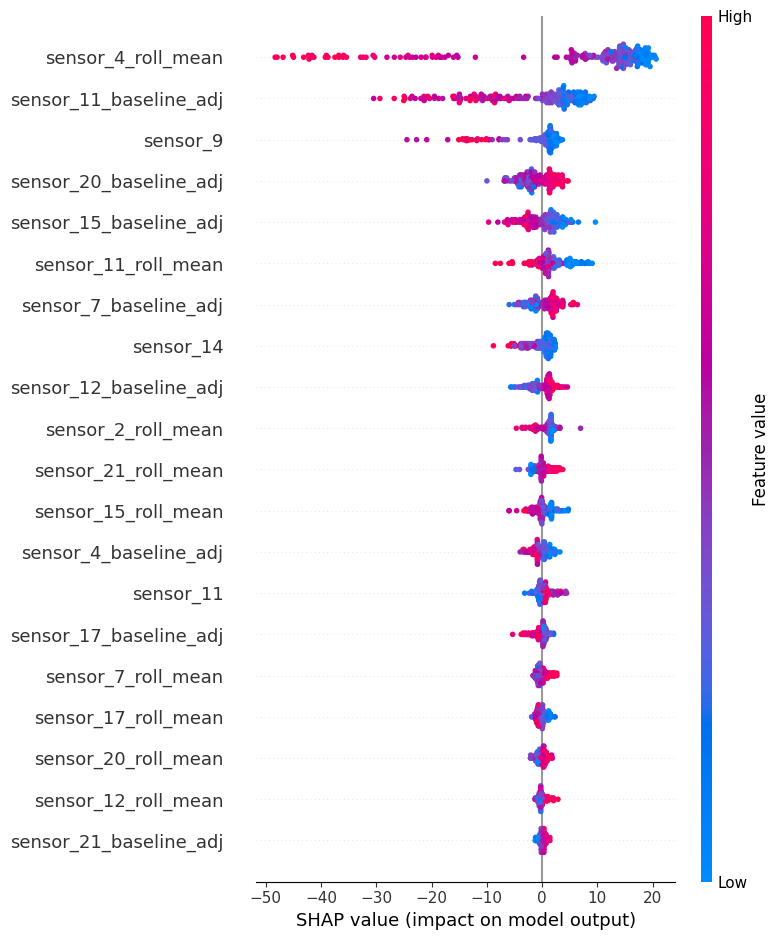

In [24]:
import shap

# Use already trained model (from last fold)
sample_X = val_fold[feature_cols].sample(200, random_state=42)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(sample_X)

shap.summary_plot(shap_values, sample_X)

### Phase 4 — Error Analysis

Objective:
Understand where the model fails:
- Early life engines?
- Mid-life?
- Near failure?

Metric focus:
- Bias (mean error)
- Variance (std error)
- Absolute error (MAE)

In [25]:
val_results = val_fold.copy()
val_results['pred'] = preds
val_results['error'] = val_results['pred'] - val_results['RUL_capped']
val_results['abs_error'] = np.abs(val_results['error'])

#### a: Bucket for RUL stage

In [26]:
val_results['RUL_bucket'] = pd.cut(
    val_results['RUL_capped'],
    bins=[0, 30, 80, 130],
    labels=['Near Failure', 'Mid Life', 'Early Life']
)

b: Full Statistical Breakdown

In [27]:
error_analysis = val_results.groupby('RUL_bucket').agg(
    mean_error=('error', 'mean'),
    std_error=('error', 'std'),
    mae=('abs_error', 'mean'),
    count=('error', 'count')
)

error_analysis

,mean_error,std_error,mae,count
RUL_bucket,,,,
Near Failure,2.587378,6.010264,4.569004,600
Mid Life,7.940979,15.670702,13.841761,1000
Early Life,-6.049423,13.297538,11.340272,2507


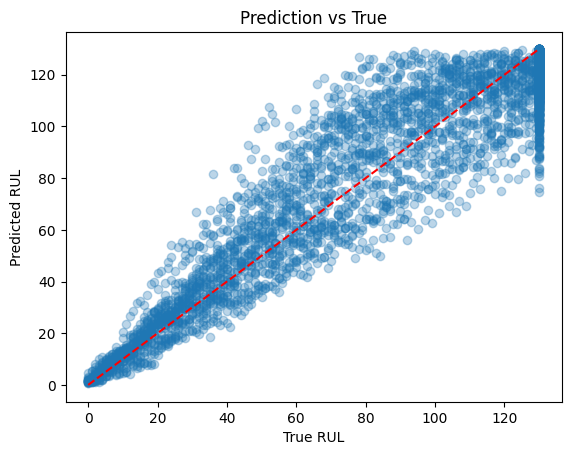

In [39]:
import matplotlib.pyplot as plt

plt.scatter(val_results['RUL_capped'], val_results['pred'], alpha=0.3)
plt.plot([0,130], [0,130], 'r--')
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("Prediction vs True")
plt.show()

In [29]:
# -----------------------------
# Cost-Sensitive Sample Weights
# -----------------------------

def compute_sample_weights(y):
    weights = np.ones_like(y)

    # Near Failure (0–30) → highest risk
    weights[y <= 30] = 3.0

    # Mid Life (30–80) → moderate risk
    weights[(y > 30) & (y <= 80)] = 2.0

    # Early Life → normal weight
    return weights


# Compute weights on training fold
sample_weights = compute_sample_weights(y_train.values)

# Re-train weighted model
weighted_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

weighted_model.fit(X_train, y_train, sample_weight=sample_weights)

# Predict
weighted_preds = weighted_model.predict(X_val)

# RMSE
weighted_rmse = np.sqrt(mean_squared_error(y_val, weighted_preds))
print("Weighted RMSE:", weighted_rmse)

# NASA Score
weighted_nasa = nasa_score(y_val.values, weighted_preds)
print("Weighted NASA Score:", weighted_nasa)

Weighted RMSE: 14.632184214194007
Weighted NASA Score: 15621.307104993737


In [30]:
import pandas as pd

feature_importance = pd.Series(
    weighted_model.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

print(feature_importance.head(15))

sensor_4_roll_mean        0.639735
sensor_11_baseline_adj    0.100000
sensor_11_roll_mean       0.035147
sensor_9                  0.032883
sensor_15_roll_mean       0.031665
sensor_15_baseline_adj    0.016996
sensor_14                 0.013707
sensor_2_roll_mean        0.012584
sensor_20_baseline_adj    0.012187
sensor_7_baseline_adj     0.010593
sensor_21_roll_mean       0.010568
sensor_4_baseline_adj     0.009297
sensor_12_baseline_adj    0.009122
sensor_7_roll_mean        0.005758
sensor_17_roll_mean       0.005634
dtype: float64


### Ablation Test:

In [31]:
# Remove dominant feature
reduced_features = [f for f in feature_cols if f != 'sensor_4_roll_mean']

X_train_red = train_fold[reduced_features]
X_val_red = val_fold[reduced_features]

model_red = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

model_red.fit(X_train_red, y_train)
preds_red = model_red.predict(X_val_red)

rmse_red = np.sqrt(mean_squared_error(y_val, preds_red))
print("RMSE without sensor_4_roll_mean:", rmse_red)

RMSE without sensor_4_roll_mean: 14.462686160020203


In [32]:
import joblib

joblib.dump(model, "../models/rf_v3.pkl")
joblib.dump(feature_cols, "../models/feature_list.pkl")

['../models/feature_list.pkl']

In [34]:
error_analysis.to_csv("../outputs/error_analysis.csv")

In [35]:
feature_importance.to_csv("../outputs/feature_importance.csv")

## Uncertainty Estimation via Tree Variance

In [40]:
import numpy as np
import pandas as pd

rf_model = model 

all_tree_preds = np.stack([
    tree.predict(X_val)
    for tree in rf_model.estimators_
], axis=0)

# Mean prediction
mean_pred = np.mean(all_tree_preds, axis=0)

# Standard deviation (uncertainty)
std_pred = np.std(all_tree_preds, axis=0)

# Confidence interval (approx 95%)
lower_bound = mean_pred - 1.96 * std_pred
upper_bound = mean_pred + 1.96 * std_pred

# Store results
uncertainty_df = val_fold.copy()
uncertainty_df['pred_mean'] = mean_pred
uncertainty_df['pred_std'] = std_pred
uncertainty_df['lower_95'] = lower_bound
uncertainty_df['upper_95'] = upper_bound

uncertainty_df.head()

c:\Users\arjit\Desktop\predictive-aircraft-maintenance\venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\arjit\Desktop\predictive-aircraft-maintenance\venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\arjit\Desktop\predictive-aircraft-maintenance\venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\arjit\Desktop\predictive-aircraft-maintenance\venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\arjit\Desktop\predictive-aircraft-maintenance\venv\Lib\site-packages\sklearn\utils\validation.py:2684: 

,unit,cycle,op_setting_1,op_setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,sensor_2_baseline_adj,sensor_17_baseline_adj,sensor_12_baseline_adj,sensor_7_baseline_adj,sensor_21_baseline_adj,sensor_20_baseline_adj,pred_mean,pred_std,lower_95,upper_95
192,2,1,-0.0018,0.0006,641.89,1583.84,1391.28,21.60,554.53,2388.01,...,0.00,0,0.00,0.00,0.0000,0.00,129.600811,1.596236,126.472188,132.729434
193,2,2,0.0043,-0.0003,641.82,1587.05,1393.13,21.61,554.77,2387.98,...,-0.07,1,0.37,0.24,-0.0500,0.12,128.143739,3.657395,120.975246,135.312232
194,2,3,0.0018,0.0003,641.55,1588.32,1398.96,21.60,555.14,2388.04,...,-0.34,0,0.25,0.61,-0.0335,0.17,129.277127,2.657390,124.068643,134.485610
195,2,4,0.0035,-0.0004,641.68,1584.15,1396.08,21.61,554.25,2387.98,...,-0.21,0,0.16,-0.28,0.0442,0.19,129.400088,2.206502,125.075344,133.724832
196,2,5,0.0005,0.0004,641.73,1579.03,1402.52,21.60,555.12,2388.03,...,-0.16,-1,-0.06,0.59,-0.0351,0.24,127.667517,4.715475,118.425186,136.909848


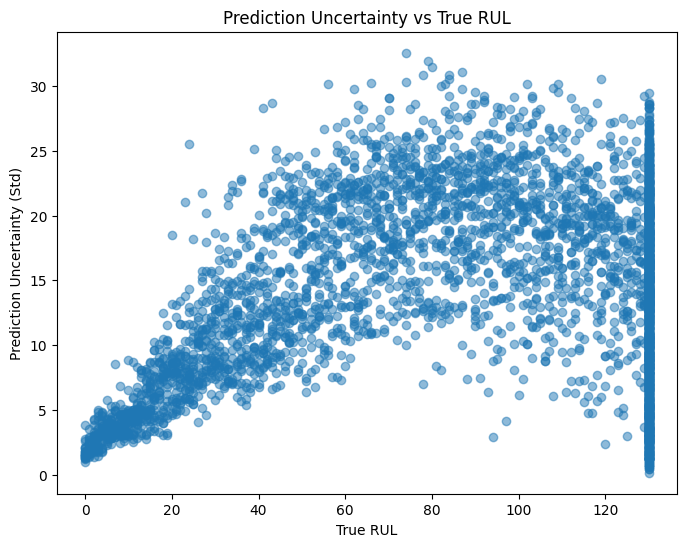

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(uncertainty_df['RUL_capped'], 
            uncertainty_df['pred_std'], 
            alpha=0.5)

plt.xlabel("True RUL")
plt.ylabel("Prediction Uncertainty (Std)")
plt.title("Prediction Uncertainty vs True RUL")
plt.show()

In [42]:
# Check how often true RUL falls inside 95% interval

within_interval = (
    (uncertainty_df['RUL_capped'] >= uncertainty_df['lower_95']) &
    (uncertainty_df['RUL_capped'] <= uncertainty_df['upper_95'])
)

coverage = within_interval.mean()

print(f"95% Interval Coverage: {coverage:.3f}")

95% Interval Coverage: 0.968


In [43]:
interval_width = (uncertainty_df['upper_95'] - uncertainty_df['lower_95']).mean()

print("Average 95% interval width:", interval_width)

Average 95% interval width: 55.934725069220896


In [45]:
# Recreate RUL bucket inside uncertainty_df

uncertainty_df['RUL_bucket'] = pd.cut(
    uncertainty_df['RUL_capped'],
    bins=[0, 30, 80, 130],
    labels=['Near Failure', 'Mid Life', 'Early Life']
)

uncertainty_df['interval_width'] = (
    uncertainty_df['upper_95'] - uncertainty_df['lower_95']
)

uncertainty_df.groupby('RUL_bucket')['interval_width'].mean()

RUL_bucket
Near Failure    25.064182
Mid Life        65.277312
Early Life      59.986677
Name: interval_width, dtype: float64

In [46]:
import joblib

# Train on full dataset
final_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

final_model.fit(df3[feature_cols], df3['RUL_capped'])

# Save model
joblib.dump(final_model, "../models/rf_v3.pkl")

# Save feature list
joblib.dump(feature_cols, "../models/feature_list.pkl")

print("Final production model saved.")

Final production model saved.
